# Python Libraries

In [49]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

# Importing dataset

In [50]:
#Importing our dataset from csv file
import pandas as pd 
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

# applying tree

In [51]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
dtree = tree.DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=10,max_depth=5 )  
dtree.fit(x_train, y_train)  #fitting our model
y_pred=dtree.predict(x_test)  # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


[Text(911.7321428571429, 996.6, 'Sex <= 0.188\ngini = 0.469\nsamples = 100.0%\nvalue = [0.624, 0.376]'),
 Text(567.9642857142857, 815.4000000000001, 'Pclass <= 1.471\ngini = 0.39\nsamples = 35.4%\nvalue = [0.266, 0.734]'),
 Text(239.14285714285714, 634.2, 'Parch <= 1.169\ngini = 0.051\nsamples = 10.7%\nvalue = [0.026, 0.974]'),
 Text(119.57142857142857, 453.0, 'gini = 0.0\nsamples = 9.0%\nvalue = [0.0, 1.0]'),
 Text(358.7142857142857, 453.0, 'gini = 0.278\nsamples = 1.7%\nvalue = [0.167, 0.833]'),
 Text(896.7857142857142, 634.2, 'Pclass <= 2.352\ngini = 0.466\nsamples = 24.7%\nvalue = [0.369, 0.631]'),
 Text(597.8571428571429, 453.0, 'Age <= 55.18\ngini = 0.16\nsamples = 8.0%\nvalue = [0.088, 0.912]'),
 Text(478.2857142857143, 271.79999999999995, 'gini = 0.133\nsamples = 7.9%\nvalue = [0.071, 0.929]'),
 Text(717.4285714285714, 271.79999999999995, 'gini = 0.0\nsamples = 0.1%\nvalue = [1.0, 0.0]'),
 Text(1195.7142857142858, 453.0, 'Fare <= 8.479\ngini = 0.5\nsamples = 16.7%\nvalue = [0.5

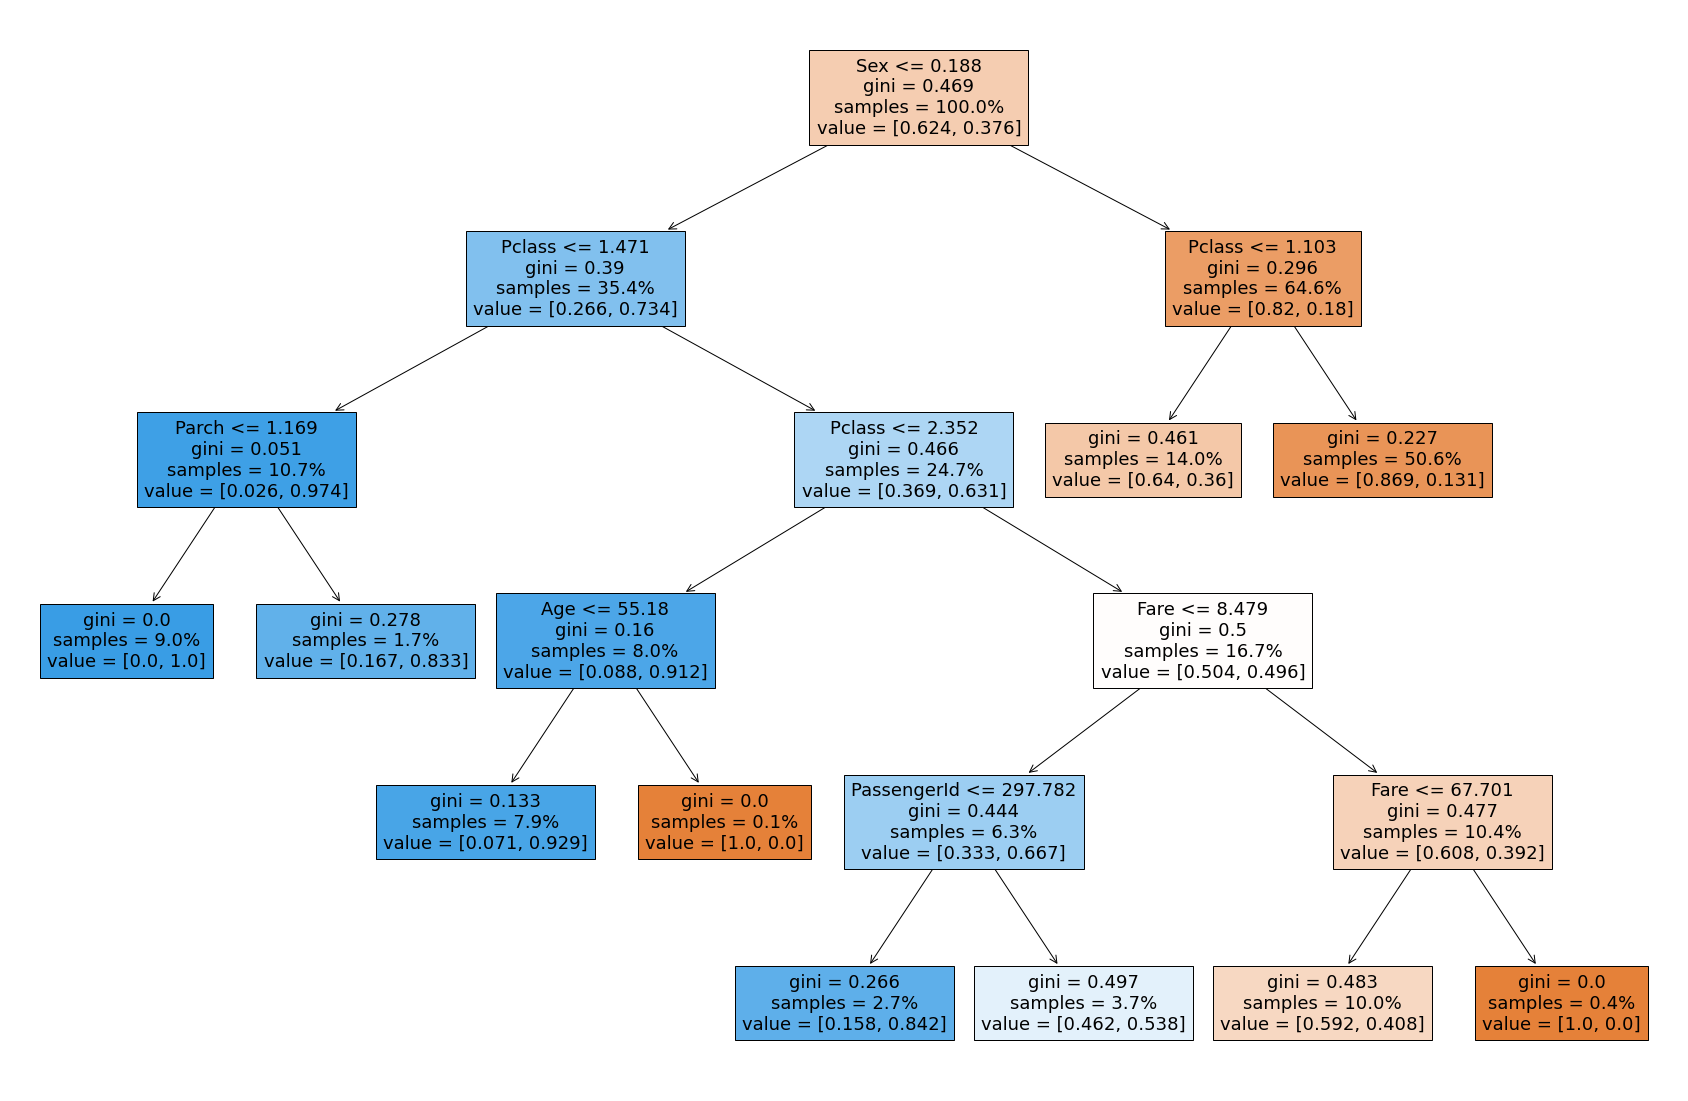

In [52]:
plt.figure(figsize = (30,20))
plot_tree(dtree, filled = True, feature_names = x.columns, proportion = True)

In [53]:
#applying tree algorithm
dtree = tree.DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=5,max_depth=3 )  
dtree.fit(x_train, y_train)  #fitting our model
y_pred=dtree.predict(x_test)  # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7877094972067039


[Text(837.0, 951.3000000000001, 'Sex <= 0.927\ngini = 0.469\nsamples = 100.0%\nvalue = [0.624, 0.376]'),
 Text(418.5, 679.5, 'Pclass <= 1.35\ngini = 0.39\nsamples = 35.4%\nvalue = [0.266, 0.734]'),
 Text(209.25, 407.70000000000005, 'gini = 0.051\nsamples = 10.7%\nvalue = [0.026, 0.974]'),
 Text(627.75, 407.70000000000005, 'Pclass <= 2.214\ngini = 0.466\nsamples = 24.7%\nvalue = [0.369, 0.631]'),
 Text(418.5, 135.89999999999998, 'gini = 0.16\nsamples = 8.0%\nvalue = [0.088, 0.912]'),
 Text(837.0, 135.89999999999998, 'gini = 0.5\nsamples = 16.7%\nvalue = [0.504, 0.496]'),
 Text(1255.5, 679.5, 'Age <= 3.937\ngini = 0.296\nsamples = 64.6%\nvalue = [0.82, 0.18]'),
 Text(1046.25, 407.70000000000005, 'gini = 0.426\nsamples = 1.8%\nvalue = [0.308, 0.692]'),
 Text(1464.75, 407.70000000000005, 'gini = 0.276\nsamples = 62.8%\nvalue = [0.834, 0.166]')]

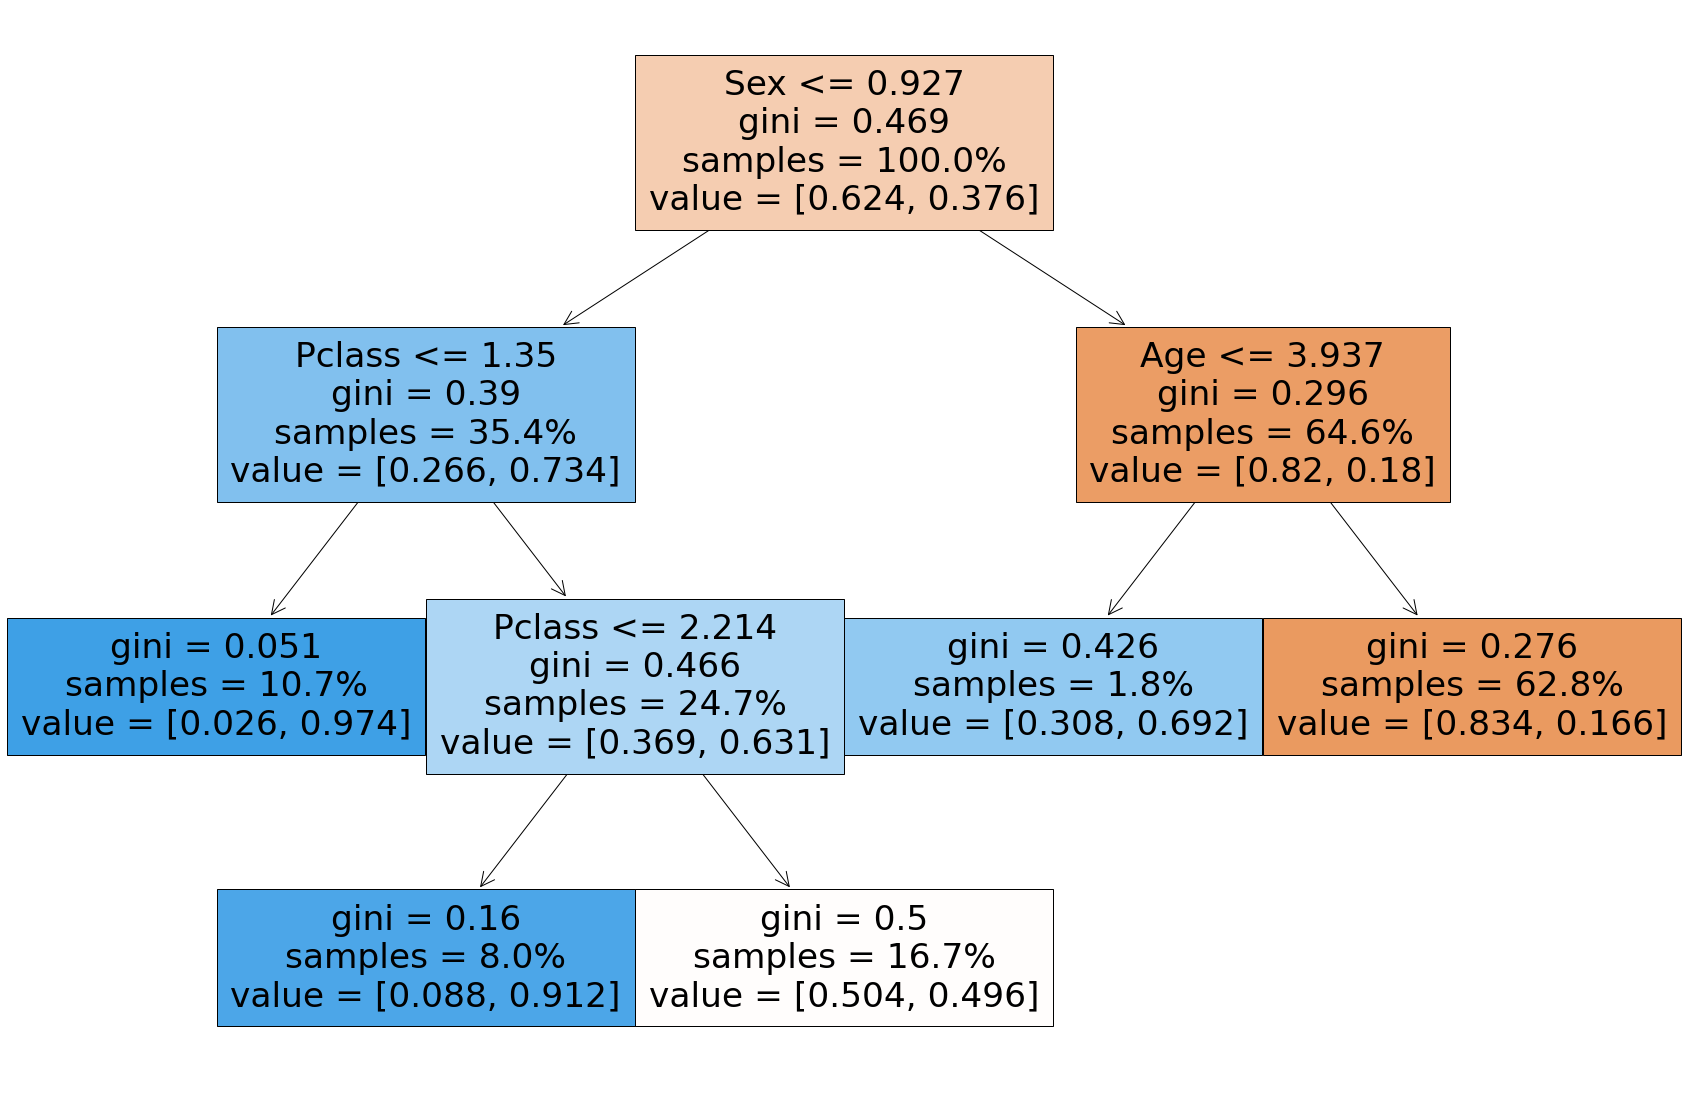

In [54]:
plt.figure(figsize = (30,20))
plot_tree(dtree, filled = True, feature_names = x.columns, proportion = True)

most females of first class surviverd (0.97%)

# Random Forest

In [55]:
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  

Accuracy: 0.8268156424581006


In [56]:
clf=RandomForestClassifier(n_estimators=100)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  

Accuracy: 0.8603351955307262


In [57]:
clf=RandomForestClassifier(n_estimators=1000)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.8491620111731844
